In [24]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
from sklearn.utils import shuffle


cleaned = full_data[full_data.Age.notnull()]
cleaned = shuffle(cleaned)

outcomes = cleaned['Survived']
data = cleaned.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.tail())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
208,209,3,"Carr, Miss. Helen ""Ellen""",female,16.00,0,0,367231,7.750,NaN,Q
263,264,1,"Harrison, Mr. William",male,40.00,0,0,112059,0.000,B94,S
78,79,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.000,NaN,S
13,14,3,"Andersson, Mr. Anders Johan",male,39.00,1,5,347082,31.275,NaN,S
150,151,2,"Bateman, Rev. Robert James",male,51.00,0,0,S.O.P. 1166,12.525,NaN,S


In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#display(outcomes)

features_train, features_test, outcomes_labels_train, outcomes_labels_test = train_test_split(data['Age'], outcomes, test_size=0.20)

clf = SVC()
clf.fit(features_train.values.reshape(-1, 1), outcomes_labels_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

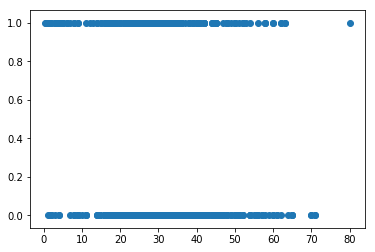

In [32]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_train, outcomes_labels_train)